# Load Traning Dataset

In [1]:
import pandas as pd
data = pd.read_csv("train_40k.csv")
data_test = pd.read_csv("val_10k.csv")
data.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


# Data Visuallisation

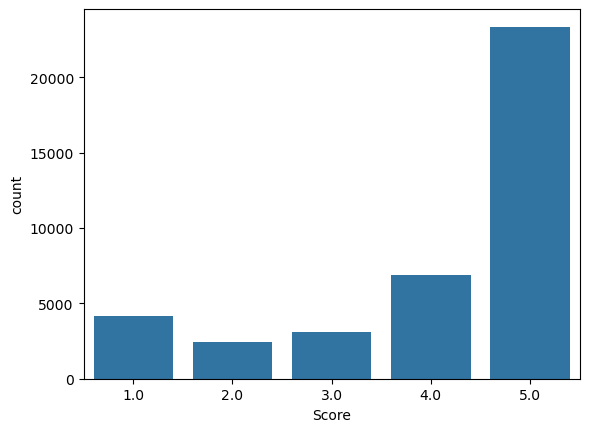

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Score', data=data)
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    40000 non-null  object 
 1   Title        39984 non-null  object 
 2   userId       40000 non-null  object 
 3   Helpfulness  40000 non-null  object 
 4   Score        40000 non-null  float64
 5   Time         40000 non-null  int64  
 6   Text         40000 non-null  object 
 7   Cat1         40000 non-null  object 
 8   Cat2         40000 non-null  object 
 9   Cat3         40000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ MB


In [4]:
data.describe()

,Score,Time
count,40000.000000,4.000000e+04
mean,4.070175,1.235878e+09
std,1.357091,8.555040e+07
min,1.000000,-1.000000e+00
25%,4.000000,1.183162e+09
50%,5.000000,1.254010e+09
75%,5.000000,1.307318e+09
max,5.000000,1.344211e+09


In [5]:
data.isnull()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

productId       0
Title          16
userId          0
Helpfulness     0
Score           0
Time            0
Text            0
Cat1            0
Cat2            0
Cat3            0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data["Score"].value_counts()

Score
5.0    23362
4.0     6881
1.0     4175
3.0     3134
2.0     2448
Name: count, dtype: int64

In [9]:
data.shape

(40000, 10)

In [10]:
data.size

400000

In [11]:
columns_to_drop = ["productId", "Title", "userId", "Helpfulness", "Time", "Cat1", "Cat2", "Cat3"]

data.drop(columns=columns_to_drop, inplace=True)
data_test.drop(columns=columns_to_drop, inplace=True)

In [12]:
data.head()

,Score,Text
0,3.0,The description and photo on this product need...
1,5.0,This was a great book!!!! It is well thought t...
2,5.0,"I am a first year teacher, teaching 5th grade...."
3,5.0,I got the book at my bookfair at school lookin...
4,5.0,Hi! I'm Martine Redman and I created this puzz...


# Process of text classification
# 1. Normalization

In [13]:
import re
from string import punctuation

def pre_process_text(text):
    processed_text = text.lower()
    processed_text =  re.sub(f"[{re.escape(punctuation)}]", "", processed_text)
    processed_text = " ".join(processed_text.split())
    return processed_text
data["Text"] = data["Text"].apply(lambda x:pre_process_text(x))
data_test["Text"] = data_test["Text"].apply(lambda x:pre_process_text(x))
data

,Score,Text
0,3.0,the description and photo on this product need...
1,5.0,this was a great book it is well thought throu...
2,5.0,i am a first year teacher teaching 5th grade i...
3,5.0,i got the book at my bookfair at school lookin...
4,5.0,hi im martine redman and i created this puzzle...
...,...,...
39995,3.0,even when it is very convenient i find it real...
39996,5.0,wore these the next day after eating chinese t...
39997,3.0,this is an ok product doesnt really stay fog f...
39998,4.0,this glitterup body lotion offers tremendous s...


# 2. Stemming

In [15]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer 

tokenizer = TreebankWordTokenizer()
ps = PorterStemmer()

def stemming(text):
    tokens = tokenizer.tokenize(text)
    required_words = [ps.stem(x) for x in tokens]
    return ' '.join(required_words)

data["Text"] = data["Text"].apply(stemming)
data_test["Text"] = data_test["Text"].apply(stemming)
data

,Score,Text
0,3.0,the descript and photo on thi product need to ...
1,5.0,thi wa a great book it is well thought through...
2,5.0,i am a first year teacher teach 5th grade i ha...
3,5.0,i got the book at my bookfair at school look f...
4,5.0,hi im martin redman and i creat thi puzzl for ...
...,...,...
39995,3.0,even when it is veri conveni i find it realli ...
39996,5.0,wore these the next day after eat chines takeo...
39997,3.0,thi is an ok product doesnt realli stay fog fr...
39998,4.0,thi glitterup bodi lotion offer tremend sparkl...


# 3. Lemmatization¶

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatization(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    required_words = [wordnet_lemmatizer.lemmatize(x, 'v') for x in  tokens]
    sentence_with_lemmnatized_word = " ".join(required_words)
    
    return sentence_with_lemmnatized_word

data["Text"] = data["Text"].apply(lambda x:lemmatization(x))
data_test["Text"] = data_test["Text"].apply(lambda x:lemmatization(x))
data


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Score,Text
0,3.0,the descript and photo on thi product need to ...
1,5.0,thi wa a great book it be well think through a...
2,5.0,i be a first year teacher teach 5th grade i ha...
3,5.0,i get the book at my bookfair at school look f...
4,5.0,hi im martin redman and i creat thi puzzl for ...
...,...,...
39995,3.0,even when it be veri conveni i find it realli ...
39996,5.0,wear these the next day after eat chin takeout...
39997,3.0,thi be an ok product doesnt realli stay fog fr...
39998,4.0,thi glitterup bodi lotion offer tremend sparkl...


# 4. Remove Stop Words

In [18]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = tokenizer.tokenize(text)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_words)
data["Text"] = data["Text"].apply(lambda x:remove_stop_words(x))
data_test["Text"] = data_test["Text"].apply(lambda x:remove_stop_words(x))
data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Score,Text
0,3.0,descript photo thi product need chang indic th...
1,5.0,thi wa great book well think easili imagin eve...
2,5.0,first year teacher teach 5th grade special rea...
3,5.0,get book bookfair school look someth summer tu...
4,5.0,hi im martin redman creat thi puzzl briarpatch...
...,...,...
39995,3.0,even veri conveni find realli small onli store...
39996,5.0,wear next day eat chin takeout ankl go inch pu...
39997,3.0,thi ok product doesnt realli stay fog free ver...
39998,4.0,thi glitterup bodi lotion offer tremend sparkl...


# Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1, 1))

X_train = vectorizer.fit_transform(data['Text'])
X_test = vectorizer.transform(data_test['Text'])

y_train = data['Score']
y_test = data_test['Score']

print("TF-IDF Vocabulary Size:", len(vectorizer.vocabulary_))
print("Sample TF-IDF Features:", list(vectorizer.vocabulary_.keys())[:10])

TF-IDF Vocabulary Size: 61466
Sample TF-IDF Features: ['descript', 'photo', 'thi', 'product', 'need', 'chang', 'indic', 'buffalo', 'version', 'beef']


In [20]:
vectorizer.vocabulary_.keys()

dict_keys(['descript', 'photo', 'thi', 'product', 'need', 'chang', 'indic', 'buffalo', 'version', 'beef', 'jerki', 'wa', 'great', 'book', 'well', 'think', 'easili', 'imagin', 'event', 'happen', 'west', 'game', 'way', 'tie', 'two', 'thing', 'togeth', 'sequenc', 'excit', 'ellen', 'raskin', 'write', 'wonder', 'first', 'year', 'teacher', 'teach', '5th', 'grade', 'special', 'read', 'class', 'high', 'comprehens', 'level', 'one', 'best', 'expand', 'mind', 'allow', 'put', 'themselv', 'charact', 'place', 'easi', 'student', 'make', 'movi', 'even', 'use', 'whole', 'time', 'order', 'finish', 'couldnt', 'wait', 'hear', 'end', 'excel', 'everi', 'get', 'bookfair', 'school', 'look', 'someth', 'summer', 'turn', 'coupl', 'day', 'let', 'love', 'never', 'suspect', 'overal', 'plot', 'intriguingli', 'superb', 'tell', 'extrem', 'intellig', 'person', 'peopl', 'qualiti', 'good', 'outshin', 'recommend', 'anyon', 'everyon', 'mom', 'like', 'talk', 'critic', 'hi', 'im', 'martin', 'redman', 'creat', 'puzzl', 'briar

# Model training

# 1 Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6412

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       846
         2.0       0.00      0.00      0.00       470
         3.0       0.00      0.00      0.00       768
         4.0       0.00      0.00      0.00      1503
         5.0       0.64      1.00      0.78      6413

    accuracy                           0.64     10000
   macro avg       0.13      0.20      0.16     10000
weighted avg       0.41      0.64      0.50     10000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Confusion Matrix

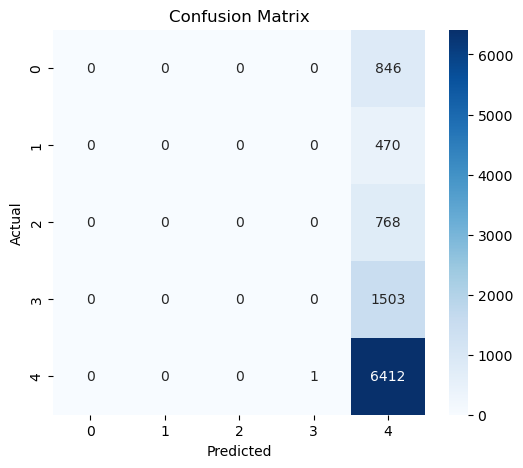

In [23]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN (k Nearest Neighbours)


k-NN Accuracy: 0.6135

k-NN Classification Report:
              precision    recall  f1-score   support

         1.0       0.26      0.20      0.22       846
         2.0       0.09      0.01      0.02       470
         3.0       0.18      0.02      0.03       768
         4.0       0.17      0.04      0.06      1503
         5.0       0.66      0.92      0.77      6413

    accuracy                           0.61     10000
   macro avg       0.27      0.24      0.22     10000
weighted avg       0.49      0.61      0.52     10000



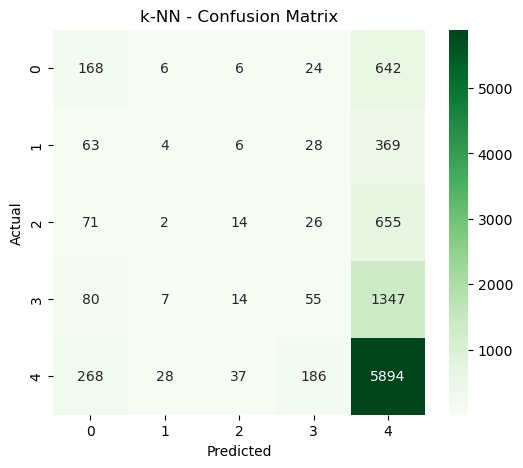

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nk-NN Accuracy: {accuracy_knn:.4f}")

print("\nk-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('k-NN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree


Decision Tree Accuracy: 0.5409

Decision Tree Classification Report:
              precision    recall  f1-score   support

         1.0       0.32      0.34      0.33       846
         2.0       0.08      0.08      0.08       470
         3.0       0.17      0.16      0.16       768
         4.0       0.20      0.22      0.21      1503
         5.0       0.73      0.72      0.73      6413

    accuracy                           0.54     10000
   macro avg       0.30      0.30      0.30     10000
weighted avg       0.55      0.54      0.54     10000



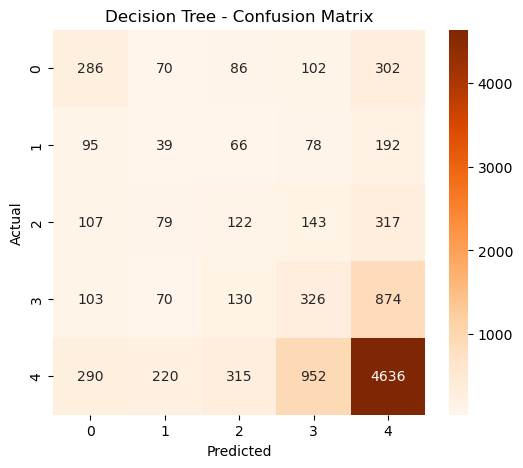

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)  
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# LinearRegression


Linear Regression (rounded) Accuracy: 0.4267

Linear Regression Classification Report:
              precision    recall  f1-score   support

         1.0       0.28      0.24      0.26       846
         2.0       0.09      0.16      0.12       470
         3.0       0.12      0.24      0.16       768
         4.0       0.18      0.32      0.23      1503
         5.0       0.77      0.52      0.62      6413

    accuracy                           0.43     10000
   macro avg       0.29      0.30      0.28     10000
weighted avg       0.56      0.43      0.47     10000



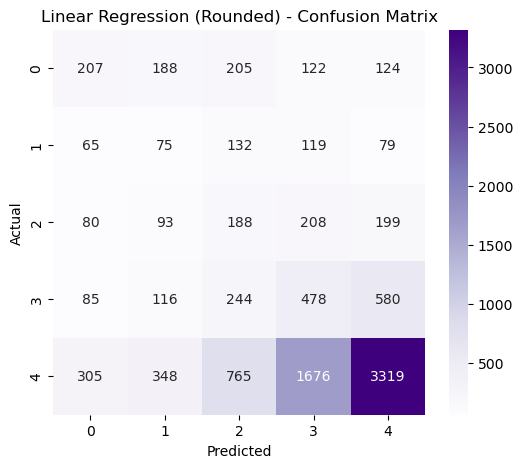

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr_continuous = lr_model.predict(X_test)
y_pred_lr = y_pred_lr_continuous.round().astype(int)

min_score, max_score = y_train.min(), y_train.max()
y_pred_lr = y_pred_lr.clip(min_score, max_score)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLinear Regression (rounded) Accuracy: {accuracy_lr:.4f}")

print("\nLinear Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples')
plt.title('Linear Regression (Rounded) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM


SVM Accuracy: 0.6739

SVM Classification Report:
              precision    recall  f1-score   support

         1.0       0.55      0.55      0.55       846
         2.0       0.16      0.06      0.09       470
         3.0       0.33      0.15      0.20       768
         4.0       0.33      0.20      0.25      1503
         5.0       0.76      0.91      0.83      6413

    accuracy                           0.67     10000
   macro avg       0.42      0.37      0.38     10000
weighted avg       0.61      0.67      0.63     10000



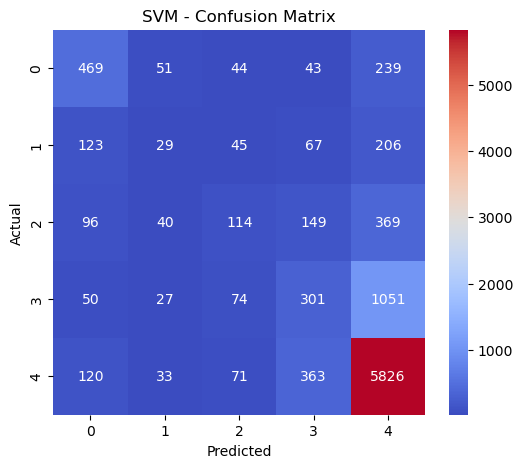

In [27]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42, max_iter=10000)  
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Accuracy: {accuracy_svm:.4f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='coolwarm')
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest


Random Forest Accuracy: 0.6550

Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.16      0.26       846
         2.0       0.00      0.00      0.00       470
         3.0       0.50      0.00      0.00       768
         4.0       0.46      0.01      0.02      1503
         5.0       0.65      1.00      0.79      6413

    accuracy                           0.66     10000
   macro avg       0.47      0.23      0.21     10000
weighted avg       0.59      0.66      0.53     10000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


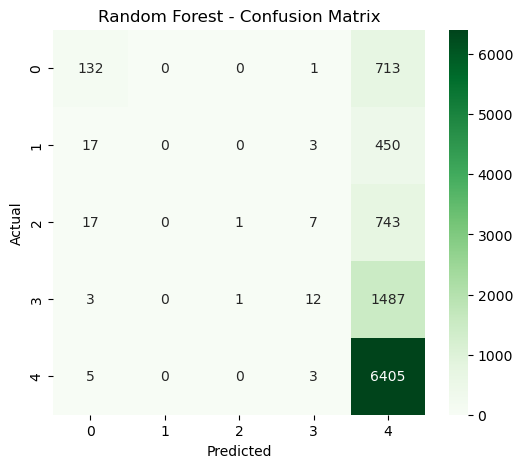

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()